In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('dataset/onlinefoods.csv')
data = data.drop(['Unnamed: 12'], axis= 1)
data.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [4]:
# quick look at the data

print(data.shape)
print(data.columns)

(388, 12)
Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')


pada kode program diatas, kita dapat melihat bahwa kita memiliki sedikit informasi terkait data yang digunakan. terdapat jumlah keseluruhan data sebesar 388 dengan memiliki 12 kolom. hal ini dapat memudahkan kita untuk melakukan analisis data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [6]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


## Data Preproses

In [7]:
# data preproses
data.isna().sum() # mengecek nilai null

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

pada data diatas, dilaporkan bahwa data yang digunakan tidak memiliki nilai null

In [8]:
data.duplicated().sum() # mengecek nilai yang duplikat

103

data yang digunakan memiliki data yang bernilai sama sebesar 103. maka dari itu, data yang redundant harus di hapus pada tahap selanjutnya

In [10]:
data = data.drop_duplicates()
data.duplicated().sum()

0

data yang sebelumnya terdapat duplikat kini sudah tidak ada karena telah dibuang.

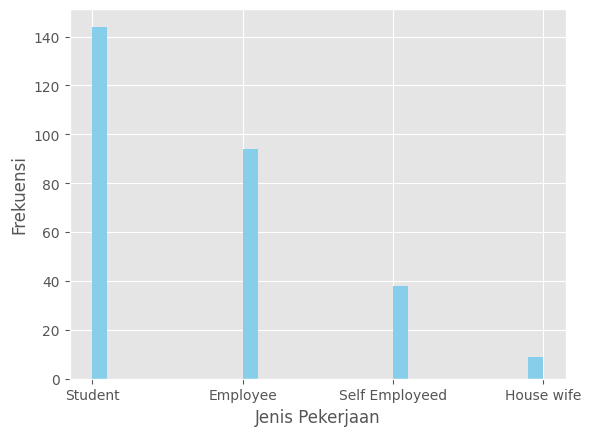

In [15]:
plt.hist(data['Occupation'], bins = 30, color ='skyblue')
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Frekuensi")
plt.show()

pada analisa awal diatas, terdapat histogram yang menunjukkan tingkat penggunaan layanan online food dari berbagai kalangan pekerjaan. pekerjaan yang sering melakukan transaksi online food yaitu dari kalangan student/ pelajar yang mendominasi dari pekerjaan employee/ karyawan, self employeed dan house wife/ ibu rumah tangga. frekuensi student yang menggunakan layanan online food mencapai lebih dari 140 transaksi.